In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Pandas library

**From the Pandas documentation:**

**pandas** is everyone's favorite data analyis library providing fast, flexible, and expressive data structures designed to work with *relational* or table-like data (SQL table or Excel spreadsheet). It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. Pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

<p>Here are just a few of the things that pandas does well:</p>
<blockquote>
<div><ul class="simple">
<li>Easy handling of <strong>missing data</strong> (represented as NaN) in floating point as
well as non-floating point data</li>
<li>Size mutability: columns can be <strong>inserted and deleted</strong> from DataFrame and
higher dimensional objects</li>
<li>Automatic and explicit <strong>data alignment</strong>: objects can be explicitly
aligned to a set of labels, or the user can simply ignore the labels and
let <cite>Series</cite>, <cite>DataFrame</cite>, etc. automatically align the data for you in
computations</li>
<li>Powerful, flexible <strong>group by</strong> functionality to perform
split-apply-combine operations on data sets, for both aggregating and
transforming data</li>
<li>Make it <strong>easy to convert</strong> ragged, differently-indexed data in other
Python and NumPy data structures into DataFrame objects</li>
<li>Intelligent label-based <strong>slicing</strong>, <strong>fancy indexing</strong>, and <strong>subsetting</strong>
of large data sets</li>
<li>Intuitive <strong>merging</strong> and <strong>joining</strong> data sets</li>
<li>Flexible <strong>reshaping</strong> and pivoting of data sets</li>
<li><strong>Hierarchical</strong> labeling of axes (possible to have multiple labels per
tick)</li>
<li>Robust IO tools for loading data from <strong>flat files</strong> (CSV and delimited),
Excel files, databases, and saving / loading data from the ultrafast <strong>HDF5
format</strong></li>
<li><strong>Time series</strong>-specific functionality: date range generation and frequency
conversion, moving window statistics, moving window linear regressions,
date shifting and lagging, etc.</li>
</ul>
</div></blockquote>
<p>Many of these principles are here to address the shortcomings frequently
experienced using other languages / scientific research environments. For data
scientists, working with data is typically divided into multiple stages:
munging and cleaning data, analyzing / modeling it, then organizing the results
of the analysis into a form suitable for plotting or tabular display. pandas
is the ideal tool for all of these tasks.</p>

# Introducing the most important objects: Series and DataFrames

In [2]:
# The importing convention
import pandas as pd

## The Pandas Series

The **Series** data structure in Pandas is a <i>one-dimensional labeled array</i>. 

* Data in the array can be of any type (integers, strings, floating point numbers, Python objects, etc.). 
* Data within the array is homogeneous
* Pandas Series objects always have an index: this gives them both ndarray-like and dict-like properties.
    
<img src="img/series3.jpg">

## Creating a Pandas Series

There are many ways to create a Pandas Series objects, some of the most common ways are:
- Creation from a list
- Creation from a dictionary
- Creation from a ndarray
- From an external source like a file

In [3]:
# define the data and index as lists
temperature = [33, 19, 15, 89, 11, -5, 9]
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# create series 
series_from_list = pd.Series(temperature, index=days)
series_from_list

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat    -5
Sun     9
dtype: int64

In [4]:
# from a dictionary
my_dict = {'Mon': 33, 'Tue': 19, 'Wed': 15, 'Thu': 89, 'Fri': 11, 'Sat': -5, 'Sun': 9}
series_from_dict = pd.Series(my_dict)
series_from_dict

Fri    11
Mon    33
Sat    -5
Sun     9
Thu    89
Tue    19
Wed    15
dtype: int64

In [5]:
# From a numpy array
my_array = np.linspace(0,10,15)
series_from_ndarray = pd.Series(my_array)
series_from_ndarray

0      0.000000
1      0.714286
2      1.428571
3      2.142857
4      2.857143
5      3.571429
6      4.285714
7      5.000000
8      5.714286
9      6.428571
10     7.142857
11     7.857143
12     8.571429
13     9.285714
14    10.000000
dtype: float64

In [6]:
#Vectorized operations also work in pandas Series
np.exp(series_from_list)

Mon    2.146436e+14
Tue    1.784823e+08
Wed    3.269017e+06
Thu    4.489613e+38
Fri    5.987414e+04
Sat    6.737947e-03
Sun    8.103084e+03
dtype: float64

## Pandas DataFrames

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

<img src="img/df1.jpg">

You can create a DataFrame from:

* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* From text, CSV, Excel files or databases
* Many other ways

Here's an example where we have set the Dates column to be the index and label for the rows. 

<img src="img/df2.jpg">

# Main properties, operations and manipulations 

## Reading the data

** Sample data: HR Employee Attrition and Performance **
You can get it from here:

https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/

In [7]:
file_url = "https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-HR-Employee-Attrition.xlsx"

In [8]:
data = pd.read_excel(io=file_url, sheetname=0, index_col='EmployeeNumber')

## The anatomy of a DataFrame

A DataFrame consists on three parts:

1. Index
2. Columns Names (Column Index)
3. Data

The row and column labels can be accessed respectively by accessing the ``index`` and ``columns`` attributes:

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.index

Int64Index([   1,    2,    4,    5,    7,    8,   10,   11,   12,   13,
            ...
            2054, 2055, 2056, 2057, 2060, 2061, 2062, 2064, 2065, 2068],
           dtype='int64', name='EmployeeNumber', length=1470)

In [11]:
data.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ..., 
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

## Inspecting your data

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3
2065,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,4,80,0,17,3,2,9,6,0,8
2068,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,...,1,80,0,6,3,4,4,3,1,2


## Selection, addition, deletion

You can treat a DataFrame like a dict of indexed Series objects. Getting, setting, and deleting columns works with the same syntax dictionary operations:

In [14]:
# Getting one column: .head() is just to print the first 5 values
data['Age'].head()

EmployeeNumber
1    41
2    49
4    37
5    33
7    27
Name: Age, dtype: int64

In [15]:
# Getting more than one column
data[['Age', 'Gender','YearsAtCompany']].head()

,Age,Gender,YearsAtCompany
EmployeeNumber,,,
1,41,Female,6
2,49,Male,10
4,37,Male,0
5,33,Female,8
7,27,Male,2


In [16]:
# Adding a column
data['AgeInMonths'] = 12*data['Age']
data['AgeInMonths'].head()

EmployeeNumber
1    492
2    588
4    444
5    396
7    324
Name: AgeInMonths, dtype: int64

In [17]:
# Deleting a column
del data['AgeInMonths']
# the drop method can also be used
data.drop('EmployeeCount', axis=1, inplace=True)

In [18]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Slices

In [19]:
data['BusinessTravel'][10:15]

EmployeeNumber
14    Travel_Rarely
15    Travel_Rarely
16    Travel_Rarely
18    Travel_Rarely
19    Travel_Rarely
Name: BusinessTravel, dtype: object

In [20]:
data[10:15]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
14,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,...,3,80,1,6,5,3,5,4,0,3
15,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,...,4,80,0,10,3,3,9,5,0,8
16,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,Male,...,4,80,1,5,1,2,5,2,4,3
18,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,2,Male,...,3,80,1,3,2,3,2,2,1,2
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,2,80,0,6,4,3,4,2,0,3


### Selection by label

In [21]:
selected_EmployeeNumbers = [15, 94, 337, 1120]

In [22]:
data['YearsAtCompany'].loc[selected_EmployeeNumbers]

EmployeeNumber
15      9
94      5
337     2
1120    7
Name: YearsAtCompany, dtype: int64

In [23]:
data.loc[selected_EmployeeNumbers]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
15,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,4,Female,...,4,80,0,10,3,3,9,5,0,8
94,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,3,Male,...,4,80,1,6,3,3,5,4,0,4
337,31,No,Travel_Frequently,1327,Research & Development,3,4,Medical,2,Male,...,1,80,1,9,3,3,2,2,2,2
1120,29,No,Travel_Rarely,1107,Research & Development,28,4,Life Sciences,3,Female,...,1,80,1,11,1,3,7,5,1,7


In [24]:
# Getting a single value
data.loc[94,'YearsAtCompany']

5

It is also possible to select by position using the *iloc* method

## Answering simple questions about a dataset

The HR director asks you to answer a few descriptive questions about employees, you use this dataset to answer them:

- How many employees are there by department in the dataset?
- What is the overall attrition rate?
- What is the average hourly rate?
- What is the average number of years at the company?
- Who are the 5 employees with the most number of years at the company?
- How satisfied are employees overall?

### How many employees are there by department in the dataset?

In [25]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### What is the overall attrition rate?

In [26]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [27]:
data['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [28]:
attrition_rate = data['Attrition'].value_counts(normalize=True)['Yes']
attrition_rate

0.16122448979591836

### What is the average hourly rate?

In [29]:
data['HourlyRate'].mean()

65.89115646258503

### What is the average number of years at the company?

In [30]:
data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

### Who are the 5 employees with the most number of years at the company?

In [31]:
data['YearsAtCompany'].sort_values(ascending=False)[:5]

EmployeeNumber
165     40
131     37
374     36
1578    36
776     34
Name: YearsAtCompany, dtype: int64

In [32]:
data['YearsAtCompany'].sort_values(ascending=False)[:5].index

Int64Index([165, 131, 374, 1578, 776], dtype='int64', name='EmployeeNumber')

### How satisfied are employees overall?

In [33]:
data['JobSatisfaction'].head()

EmployeeNumber
1    4
2    2
4    3
5    3
7    2
Name: JobSatisfaction, dtype: int64

In [34]:
JobSatisfaction_cat = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

Transform this encodings to meaninful labels

In [35]:
data['JobSatisfaction'] = data['JobSatisfaction'].map(JobSatisfaction_cat)
data['JobSatisfaction'].head()

EmployeeNumber
1    Very High
2       Medium
4         High
5         High
7       Medium
Name: JobSatisfaction, dtype: object

In [36]:
data['JobSatisfaction'].value_counts()

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

In [37]:
100*data['JobSatisfaction'].value_counts(normalize=True)

Very High    31.224490
High         30.068027
Low          19.659864
Medium       19.047619
Name: JobSatisfaction, dtype: float64

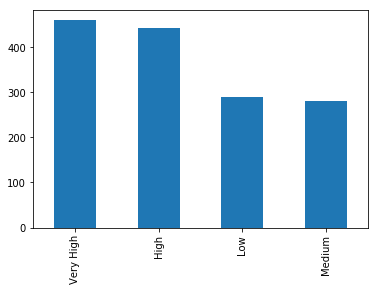

In [38]:
data['JobSatisfaction'].value_counts().plot(kind='bar')

Transforming data to an ordinal category

In [39]:
data['JobSatisfaction'] = data['JobSatisfaction'].astype(dtype='category', 
                               categories=['Low', 'Medium', 'High', 'Very High'],
                               ordered=True)
data['JobSatisfaction'].head()

EmployeeNumber
1    Very High
2       Medium
4         High
5         High
7       Medium
Name: JobSatisfaction, dtype: category
Categories (4, object): [Low < Medium < High < Very High]

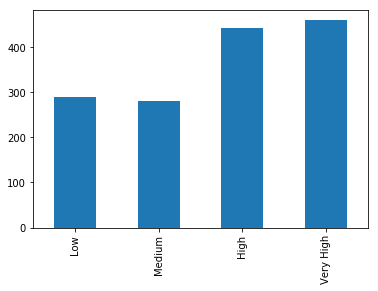

In [40]:
data['JobSatisfaction'].value_counts(sort=False).plot(kind='bar')

## Further questions

In [41]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

After taking a look at your asnwers the HR director, asks you more questions:

- Give me the list of the employees with Low level of JobSatisfaction
- Give me the list of the employees with Low level of both JobSatisfaction and PerformanceRating
- Compare the employees with Low and Very High JobSatisfaction across the following variables: Age, Department, DistanceFromHome, HourlyRate, MonthlyIncome and YearsAtCompany.

### Give me the list of the employees with Low level of JobSatisfaction

In [42]:
data['JobSatisfaction'] == 'Low'

EmployeeNumber
1       False
2       False
4       False
5       False
7       False
8       False
10       True
11      False
12      False
13      False
14      False
15      False
16      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
26      False
27       True
28      False
30      False
31       True
32      False
33       True
35      False
36      False
38       True
        ...  
2025    False
2026    False
2027    False
2031    False
2032    False
2034    False
2035    False
2036    False
2037    False
2038     True
2040    False
2041    False
2044    False
2045    False
2046    False
2048    False
2049    False
2051    False
2052    False
2053    False
2054     True
2055     True
2056    False
2057     True
2060    False
2061    False
2062     True
2064    False
2065    False
2068    False
Name: JobSatisfaction, Length: 1470, dtype: bool

We can use a boolean series to index a Series or a DataFrame, this is called "Masking" or boolean indexing.

In [43]:
data.loc[data['JobSatisfaction'] == 'Low'].index

Int64Index([  10,   20,   27,   31,   33,   38,   51,   52,   54,   68,
            ...
            1975, 1980, 1998, 2021, 2023, 2038, 2054, 2055, 2057, 2062],
           dtype='int64', name='EmployeeNumber', length=289)

### Give me the list of the employees with Low level of both JobSatisfaction and JobInvolment

In [44]:
JobInvolment_cat = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
data['JobInvolvement'] = data['JobInvolvement'].map(JobInvolment_cat)

In [45]:
data.loc[(data['JobSatisfaction'] == 'Low') & (data['JobInvolvement'] == 'Low')].index.values

array([  33,  235,  454,  615, 1019, 1037, 1237, 1460, 1478, 1544, 1611,
       1622, 1905, 1956])

### Compare the employees with Low and Very High JobSatisfaction across the following variables: Age, Department, DistanceFromHome, HourlyRate, MonthlyIncome and YearsAtCompany.

**Grouping operations**: Split-Apply-Combine operation.

By **grouping** or **group by** operations we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

<b>Step1 (Split): </b> The <i>groupby</i> operation <b><i>splits</b></i> the dataframe into a group of dataframes based on some criteria. Note that the grouped object is <i>not</i> a dataframe. It is a GroupBy object. It has a dictionary-like structure and is also iterable.

<img src="img/groupby1.jpg">

<b>Step 2 (Analyze):</b> Once we have a grouped object we can <b><i>apply</b></i> functions or run analysis to each group, set of groups, or the entire group. 

<img src="img/groupby2.jpg">

<b>Step 3 (Combine):</b> We can also <b><i>combine</b></i> the results of the analysis into a new data structure(s). 

<img src="img/groupby3.jpg">

Since we are only interested in the employees with "Low" and "Very High" JobSatisfaction levels, let's create a new DataFrame containing only those observations.

In [46]:
subset_of_interest = data.loc[(data['JobSatisfaction'] == "Low") | (data['JobSatisfaction'] == "Very High")]
subset_of_interest.shape

(748, 33)

Since our JobSatisfaction variable had 4 categories, this categories have stayed in the series of this new DataFrame:

In [47]:
subset_of_interest['JobSatisfaction'].value_counts()

Very High    459
Low          289
High           0
Medium         0
Name: JobSatisfaction, dtype: int64

Let's remove those categories we won't be using:

In [48]:
subset_of_interest['JobSatisfaction'].cat.remove_unused_categories(inplace=True)

In [49]:
subset_of_interest['JobSatisfaction'].value_counts()

Very High    459
Low          289
Name: JobSatisfaction, dtype: int64

Now we have only the employees we are interested in, we can now compare across the variables we wanted. First let's split our new DataFrame into groups.

In [50]:
grouped = subset_of_interest.groupby('JobSatisfaction')

In [51]:
grouped.groups

{'Low': Int64Index([  10,   20,   27,   31,   33,   38,   51,   52,   54,   68,
             ...
             1975, 1980, 1998, 2021, 2023, 2038, 2054, 2055, 2057, 2062],
            dtype='int64', name='EmployeeNumber', length=289),
 'Very High': Int64Index([   1,    8,   18,   22,   23,   24,   30,   36,   39,   40,
             ...
             2022, 2024, 2027, 2036, 2040, 2041, 2045, 2052, 2056, 2061],
            dtype='int64', name='EmployeeNumber', length=459)}

In [52]:
grouped.get_group('Low').head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
10,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,1,80,3,12,3,2,1,0,0,0
20,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,...,3,80,1,10,1,3,10,9,8,8
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,2,80,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,80,0,8,2,3,4,2,1,3
33,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,2,Female,...,2,80,0,10,5,3,10,2,6,7


#### Age

In [53]:
grouped['Age']

In [54]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Very High    36.795207
Name: Age, dtype: float64

In [55]:
grouped['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,36.916955,9.245496,19.0,30.0,36.0,42.0,60.0
Very High,459.0,36.795207,9.125609,18.0,30.0,35.0,43.0,60.0


In [56]:
grouped['Age'].describe().unstack()

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                 36.916955
       Very High           36.795207
std    Low                  9.245496
       Very High            9.125609
min    Low                 19.000000
       Very High           18.000000
25%    Low                 30.000000
       Very High           30.000000
50%    Low                 36.000000
       Very High           35.000000
75%    Low                 42.000000
       Very High           43.000000
max    Low                 60.000000
       Very High           60.000000
dtype: float64

#### Department

In [57]:
grouped['Department'].value_counts().unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,11,192,86
Very High,17,295,147


In [58]:
100*grouped['Department'].value_counts(normalize=True).unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,3.806228,66.435986,29.757785
Very High,3.703704,64.270153,32.026144


#### DistanceFromHome

In [59]:
grouped['DistanceFromHome'].describe().unstack()

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                  9.190311
       Very High            9.030501
std    Low                  8.045127
       Very High            8.257004
min    Low                  1.000000
       Very High            1.000000
25%    Low                  2.000000
       Very High            2.000000
50%    Low                  7.000000
       Very High            7.000000
75%    Low                 14.000000
       Very High           14.000000
max    Low                 29.000000
       Very High           29.000000
dtype: float64

#### HourlyRate

In [60]:
grouped['HourlyRate'].describe().unstack()

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                 68.636678
       Very High           64.681917
std    Low                 20.439515
       Very High           20.647571
min    Low                 30.000000
       Very High           30.000000
25%    Low                 52.000000
       Very High           47.000000
50%    Low                 72.000000
       Very High           64.000000
75%    Low                 86.000000
       Very High           82.500000
max    Low                100.000000
       Very High          100.000000
dtype: float64

#### MonthlyIncome

In [61]:
grouped['MonthlyIncome'].describe().unstack()

       JobSatisfaction
count  Low                  289.000000
       Very High            459.000000
mean   Low                 6561.570934
       Very High           6472.732026
std    Low                 4645.170134
       Very High           4573.906428
min    Low                 1091.000000
       Very High           1051.000000
25%    Low                 3072.000000
       Very High           2927.500000
50%    Low                 4968.000000
       Very High           5126.000000
75%    Low                 8564.000000
       Very High           7908.000000
max    Low                19943.000000
       Very High          19845.000000
dtype: float64

#### YearsAtCompany

In [62]:
grouped['YearsAtCompany'].describe().unstack()

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                  6.989619
       Very High            6.962963
std    Low                  6.243599
       Very High            5.900257
min    Low                  0.000000
       Very High            0.000000
25%    Low                  3.000000
       Very High            3.000000
50%    Low                  5.000000
       Very High            5.000000
75%    Low                  9.000000
       Very High           10.000000
max    Low                 36.000000
       Very High           40.000000
dtype: float64

### Comparing the means across all numerical variables

Although we asked for just some specific columns, to give the HR director a better picture of how these groups compare across different variables, let's create a DataFrame that contains the mean for every numeric variable in our dataset.         

In [63]:
# Getting the numerical columns
numeric_cols = subset_of_interest.select_dtypes(include=[np.number]).columns

In [64]:
# Creating an empty DataFrame
mean_comparison_df = pd.DataFrame(columns=numeric_cols, index=['Low', 'Very High'])
mean_comparison_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Very High    36.795207
Name: Age, dtype: float64

In [66]:
# Filling the DataFrame
for var in numeric_cols:
    mean_comparison_df[var] = grouped[var].mean()

In [67]:
mean_comparison_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Low,36.916955,782.505190,9.190311,2.944637,2.743945,68.636678,2.055363,6561.570934,14095.377163,2.871972,...,2.730104,80,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
Very High,36.795207,802.069717,9.030501,2.901961,2.749455,64.681917,2.052288,6472.732026,14103.429194,2.516340,...,2.701525,80,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


In [68]:
mean_comparison_df = mean_comparison_df.transpose()
mean_comparison_df

,Low,Very High
Age,36.916955,36.795207
DailyRate,782.505190,802.069717
DistanceFromHome,9.190311,9.030501
Education,2.944637,2.901961
EnvironmentSatisfaction,2.743945,2.749455
HourlyRate,68.636678,64.681917
JobLevel,2.055363,2.052288
MonthlyIncome,6561.570934,6472.732026
MonthlyRate,14095.377163,14103.429194
NumCompaniesWorked,2.871972,2.516340


### Let's do a visualization

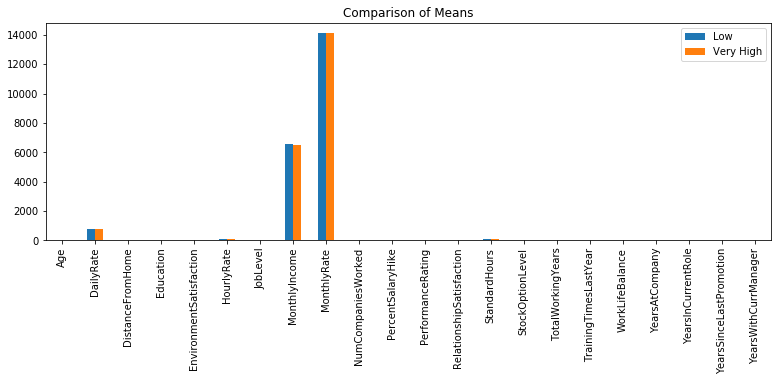

In [69]:
mean_comparison_df.plot(kind='bar', figsize=(13,4),
                                   title="Comparison of Means");

In [70]:
overal_means = data.mean()
normalized_mean_comparison_df = mean_comparison_df.copy()

In [71]:
overal_means = data.mean()
normalized_mean_comparison_df['Low'] = mean_comparison_df['Low'] / overal_means
normalized_mean_comparison_df['Very High'] = mean_comparison_df['Very High'] / overal_means

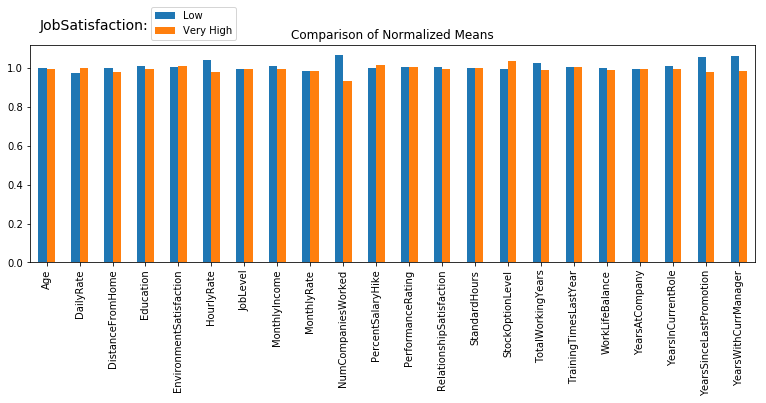

In [72]:
normalized_mean_comparison_df.plot(kind='bar', figsize=(13,4),
                                   title="Comparison of Normalized Means")
plt.legend(loc='lower left', bbox_to_anchor=(0.16, 1.0))
plt.text(x=-0.2, y = 1.2, s="JobSatisfaction:", fontdict={'size':14});

Issues to keep in mind about this dataset:
    
- There are many variables that are detected as numerical but are actually categorical (like Education).
- Since this is a simulated dataset, it is hard to find interesting patterns.